In [62]:
%matplotlib inline
import numpy as np
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import stats
sns.set(style="whitegrid", color_codes=True)
plt.rcParams['figure.figsize'] = (12, 12)

In [38]:
df_07_13 = pd.read_csv("../data/Spreadsheet/2017-07-13.csv")
df_08_03 = pd.read_csv("../data/Spreadsheet/2017-08-03.csv")

In [39]:
df_07_13.head()

,SPAD,NDVI,WP
0,53.10,0.747920,-6.37
1,9.05,0.299633,-10.36
2,72.91,0.805075,-5.38
3,12.00,0.438770,-15.39
4,80.49,0.900775,-5.48


In [40]:
ndvi = df_07_13["NDVI"].as_matrix()
spad = df_07_13["SPAD"].as_matrix()
ndvi = np.concatenate((ndvi, df_08_03["NDVI"].as_matrix()))
spad = np.concatenate((spad, df_08_03["SPAD"].as_matrix()))

In [41]:
stats.pearsonr(spad, ndvi)

(0.86642904226940798, 6.1121024478901751e-10)

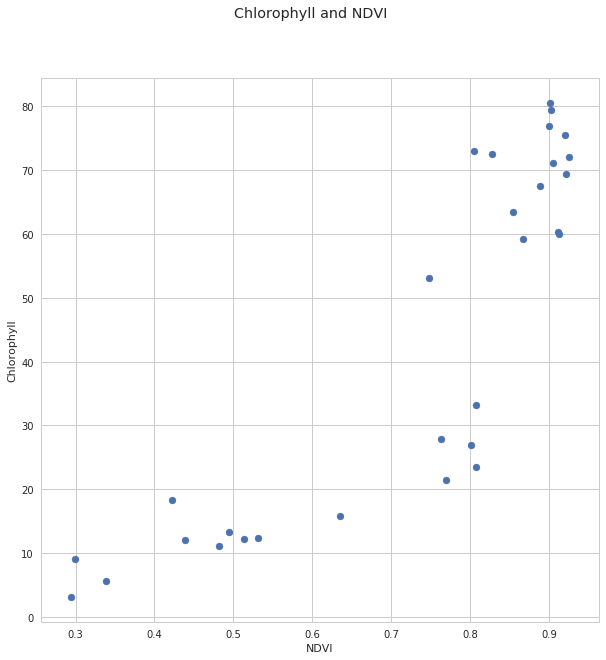

In [42]:
fig = plt.figure()
plt.scatter(ndvi, spad)
fig.suptitle("Chlorophyll and NDVI")
plt.xlabel("NDVI")
plt.ylabel("Chlorophyll")

# Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [44]:
def rmse(y, yhat):
    return np.sqrt(np.mean((y - yhat)**2))

In [45]:
X_train, X_valid, y_train, y_valid = train_test_split(ndvi.reshape(-1, 1), spad, test_size=0.15)

In [46]:
model = LinearRegression()
model.fit(X_train, y_train)
print("Training error:", rmse(y_train, model.predict(X_train)))

Training error: 14.4895800687


In [47]:
print("Validation error:", rmse(y_valid, model.predict(X_valid)))

Validation error: 10.3011572818


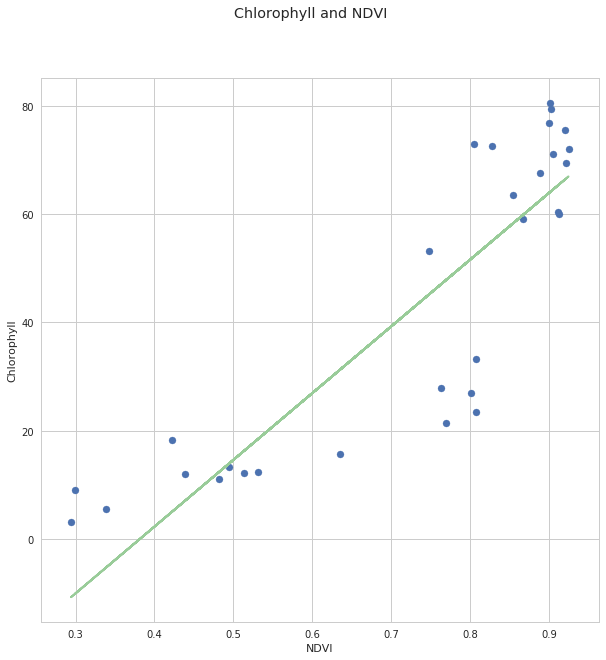

In [48]:
fig = plt.figure()
plt.scatter(ndvi, spad)
plt.plot(ndvi, model.predict(ndvi.reshape(-1, 1)), color="#99CC99", linewidth=2)
fig.suptitle("Chlorophyll and NDVI")
plt.xlabel("NDVI")
plt.ylabel("Chlorophyll")

# Polynomial Regression

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [50]:
model = Pipeline([("poly", PolynomialFeatures(degree=2)), ("linear", LinearRegression(fit_intercept=False))])
model.fit(X_train, y_train)
print("Training error:", rmse(y_train, model.predict(X_train)))

Training error: 12.2376170233


In [51]:
print("Validation error:", rmse(y_valid, model.predict(X_valid)))

Validation error: 6.51825247722


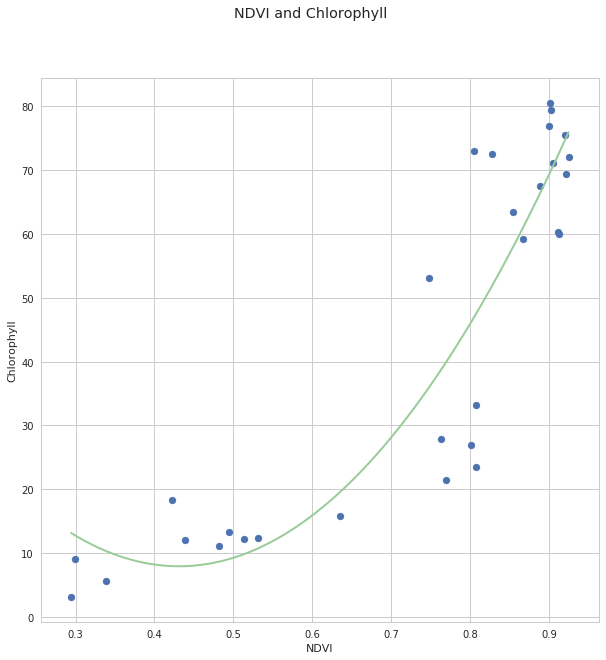

In [52]:
fig = plt.figure()
plt.scatter(ndvi, spad)
datax_os = np.linspace(np.min(ndvi), np.max(ndvi), 1024)
plt.plot(datax_os, model.predict(datax_os.reshape(-1,1)), color="#99CC99", linewidth=2) # 'smoother' line
fig.suptitle("NDVI and Chlorophyll")
plt.xlabel("NDVI")
plt.ylabel("Chlorophyll")

In [66]:
SMALL_SIZE = 16
MEDIUM_SIZE = 18
BIGGER_SIZE = 20

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

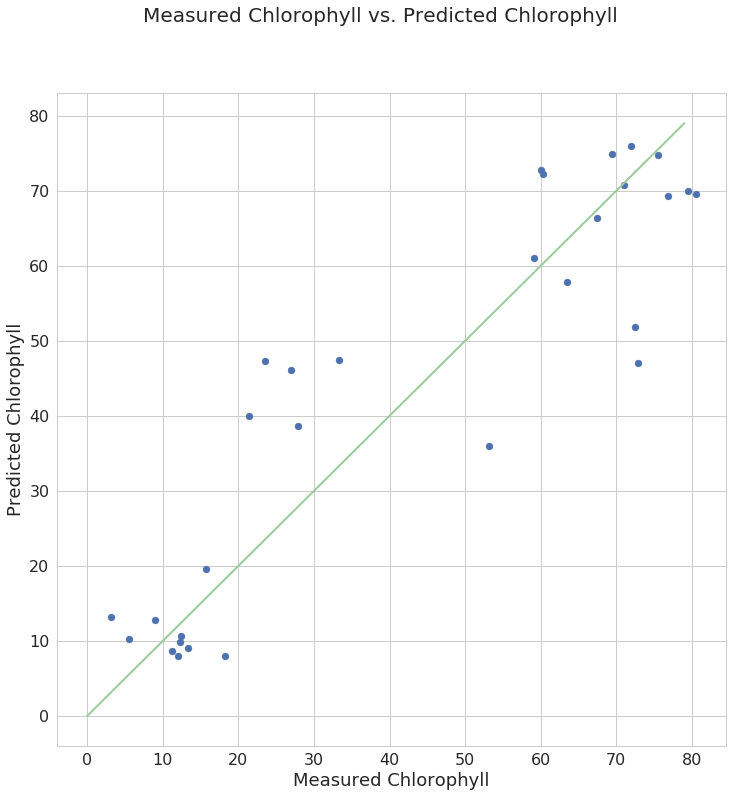

In [67]:
fig = plt.figure()
plt.scatter(spad, model.predict(ndvi.reshape(-1, 1)))
plt.plot(range(80), range(80), color="#99CC99", linewidth=2)
fig.suptitle("Measured Chlorophyll vs. Predicted Chlorophyll")
plt.xlabel("Measured Chlorophyll")
plt.ylabel("Predicted Chlorophyll")